In [1]:
# import dependencies
import pandas as pd
import numpy as np
import gmaps
import requests
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.stats as sts
from scipy.stats import linregress
from config import key_dict
gkey=key_dict["maps"]

In [2]:
# read in csv file for data
all_data = pd.read_csv("Resources/all_data.csv")

# read in csv for lat/lng
coordinates = pd.read_csv("Resources/coords.csv", encoding="windows-1252")

# check out col names
all_data.columns

Index(['Year', 'Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [3]:
# merge all_data and coordinates
merged_group_df=all_data.merge(coordinates, how="left", left_on="Country", right_on="name")
merged_group_df

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,country,latitude,longitude,name
0,2015,Afghanistan,Southern Asia,153,3.575,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,1.952100,AF,33.939110,67.709953,Afghanistan
1,2016,Afghanistan,Southern Asia,154,3.360,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2.145580,AF,33.939110,67.709953,Afghanistan
2,2017,Afghanistan,Southern Asia,141,3.794,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2.150801,AF,33.939110,67.709953,Afghanistan
3,2018,Afghanistan,Southern Asia,145,3.632,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,NaN,AF,33.939110,67.709953,Afghanistan
4,2019,Afghanistan,Southern Asia,154,3.203,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,NaN,AF,33.939110,67.709953,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,2015,Zimbabwe,Sub-Saharan Africa,115,4.610,0.271000,1.032760,0.334750,0.258610,0.080790,0.189870,2.441910,ZW,-19.015438,29.154857,Zimbabwe
778,2016,Zimbabwe,Sub-Saharan Africa,131,4.193,0.350410,0.714780,0.159500,0.254290,0.085820,0.185030,2.442700,ZW,-19.015438,29.154857,Zimbabwe
779,2017,Zimbabwe,Sub-Saharan Africa,138,3.875,0.375847,1.083096,0.196764,0.336384,0.095375,0.189143,1.597970,ZW,-19.015438,29.154857,Zimbabwe
780,2018,Zimbabwe,Sub-Saharan Africa,144,3.692,0.357000,1.094000,0.248000,0.406000,0.099000,0.132000,NaN,ZW,-19.015438,29.154857,Zimbabwe


In [4]:
# check if there is null values
merged_group_df.dtypes

Year                               int64
Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
country                           object
latitude                         float64
longitude                        float64
name                              object
dtype: object

In [5]:
# find out the countries that has no coordinates
index=merged_group_df[merged_group_df["latitude"].isnull()].index.tolist()
merged_group_df.loc[index,"Country"]

Series([], Name: Country, dtype: object)

### When merge how="left", we got 8 counties without coordinates, we can either find out the coordinates for these countries or we can drop those countries by dropna or merge by inner

In [6]:
# merge inner
merged_group_df=all_data.merge(coordinates, how="inner", left_on="Country", right_on="name")
merged_group_df

,Year,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,country,latitude,longitude,name
0,2015,Afghanistan,Southern Asia,153,3.575,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,1.952100,AF,33.939110,67.709953,Afghanistan
1,2016,Afghanistan,Southern Asia,154,3.360,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2.145580,AF,33.939110,67.709953,Afghanistan
2,2017,Afghanistan,Southern Asia,141,3.794,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2.150801,AF,33.939110,67.709953,Afghanistan
3,2018,Afghanistan,Southern Asia,145,3.632,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,NaN,AF,33.939110,67.709953,Afghanistan
4,2019,Afghanistan,Southern Asia,154,3.203,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,NaN,AF,33.939110,67.709953,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,2015,Zimbabwe,Sub-Saharan Africa,115,4.610,0.271000,1.032760,0.334750,0.258610,0.080790,0.189870,2.441910,ZW,-19.015438,29.154857,Zimbabwe
778,2016,Zimbabwe,Sub-Saharan Africa,131,4.193,0.350410,0.714780,0.159500,0.254290,0.085820,0.185030,2.442700,ZW,-19.015438,29.154857,Zimbabwe
779,2017,Zimbabwe,Sub-Saharan Africa,138,3.875,0.375847,1.083096,0.196764,0.336384,0.095375,0.189143,1.597970,ZW,-19.015438,29.154857,Zimbabwe
780,2018,Zimbabwe,Sub-Saharan Africa,144,3.692,0.357000,1.094000,0.248000,0.406000,0.099000,0.132000,NaN,ZW,-19.015438,29.154857,Zimbabwe


In [7]:
merged_group_df.isnull().sum()

Year                               0
Country                            0
Region                             0
Happiness Rank                     0
Happiness Score                    0
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      1
Generosity                         0
Dystopia Residual                312
country                            4
latitude                           0
longitude                          0
name                               0
dtype: int64

In [8]:
# gather columns we need 
clean_data=merged_group_df[['Year', 'Region','Country','latitude','longitude', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',"Dystopia Residual"]]
clean_data

,Year,Region,Country,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,2015,Southern Asia,Afghanistan,33.939110,67.709953,153,3.575,0.319820,0.302850,0.303350,0.234140,0.097190,0.365100,1.952100
1,2016,Southern Asia,Afghanistan,33.939110,67.709953,154,3.360,0.382270,0.110370,0.173440,0.164300,0.071120,0.312680,2.145580
2,2017,Southern Asia,Afghanistan,33.939110,67.709953,141,3.794,0.401477,0.581543,0.180747,0.106180,0.061158,0.311871,2.150801
3,2018,Southern Asia,Afghanistan,33.939110,67.709953,145,3.632,0.332000,0.537000,0.255000,0.085000,0.036000,0.191000,NaN
4,2019,Southern Asia,Afghanistan,33.939110,67.709953,154,3.203,0.350000,0.517000,0.361000,0.000000,0.025000,0.158000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,2015,Sub-Saharan Africa,Zimbabwe,-19.015438,29.154857,115,4.610,0.271000,1.032760,0.334750,0.258610,0.080790,0.189870,2.441910
778,2016,Sub-Saharan Africa,Zimbabwe,-19.015438,29.154857,131,4.193,0.350410,0.714780,0.159500,0.254290,0.085820,0.185030,2.442700
779,2017,Sub-Saharan Africa,Zimbabwe,-19.015438,29.154857,138,3.875,0.375847,1.083096,0.196764,0.336384,0.095375,0.189143,1.597970
780,2018,Sub-Saharan Africa,Zimbabwe,-19.015438,29.154857,144,3.692,0.357000,1.094000,0.248000,0.406000,0.099000,0.132000,NaN


In [9]:
# group by region and country
group_df = clean_data.groupby(['Region','Country']).mean()


In [10]:
# heatmap for all the countries 
# gmaps.configure(api_key=gkey)
# fig=gmaps.figure()
# locations=group_df[["latitude","longitude"]].astype(float)
# happiness=group_df["Happiness Score"].astype(float)
# heat_layer=gmaps.heatmap_layer(locations,weights=happiness,
#                                dissipating=False, max_intensity=5, 
#                                point_radius=3)
# fig.add_layer(heat_layer)
# fig

In [11]:
# find the top ten countries
top_ten=group_df.sort_values(by=["Happiness Score"],ascending=False).head(10)
top_ten=top_ten.reset_index()
top_ten


,Region,Country,Year,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,Denmark,2017.0,56.263920,9.501785,2.2,7.5460,1.396729,1.447688,0.865249,0.625959,0.429374,0.318876,2.515046
1,Western Europe,Norway,2017.0,60.472024,8.468946,2.8,7.5410,1.519381,1.431075,0.873333,0.638049,0.343951,0.328990,2.468996
2,Western Europe,Finland,2017.0,61.924110,25.748151,3.6,7.5378,1.356960,1.434429,0.873836,0.621536,0.398474,0.217783,2.625231
3,Western Europe,Switzerland,2017.0,46.818188,8.227512,3.6,7.5114,1.472164,1.417332,0.928318,0.620642,0.379763,0.277432,2.496242
4,Western Europe,Iceland,2017.0,64.963051,-19.020835,3.2,7.5110,1.386523,1.492813,0.917744,0.618035,0.140145,0.419124,2.618698
5,Western Europe,Netherlands,2017.0,52.132633,5.291266,6.2,7.4046,1.411013,1.349646,0.878569,0.589651,0.298614,0.415150,2.489331
6,North America,Canada,2017.0,56.130366,-106.346771,6.8,7.3506,1.388129,1.387412,0.900558,0.610954,0.305846,0.389598,2.447958
7,Western Europe,Sweden,2017.0,60.128161,18.643501,8.6,7.3192,1.403981,1.368574,0.898991,0.617581,0.397502,0.336512,2.338689
8,Australia and New Zealand,New Zealand,2017.0,-40.900557,174.885971,8.2,7.3130,1.317509,1.439729,0.891618,0.617782,0.400015,0.432805,2.262079
9,Australia and New Zealand,Australia,2017.0,-25.274398,133.775136,10.0,7.2762,1.394885,1.409006,0.914529,0.605043,0.314573,0.416078,2.292724


In [12]:
# # mark top ten countries
# coordinates=top_ten[["latitude","longitude"]].astype(float)
# top_symbol=gmaps.symbol_layer(coordinates,
#                            info_box_content=top_ten["Country"],
#                           stroke_color="green")
# fig.add_layer(top_symbol)
# fig
                    

In [13]:
botomn_ten=group_df.sort_values(by=["Happiness Score"],ascending=False).tail(10)
botomn_ten=botomn_ten.reset_index()
botomn_ten

,Region,Country,Year,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Sub-Saharan Africa,Madagascar,2017.00,-18.766947,46.869107,145.00,3.74540,0.265918,0.773236,0.434105,0.177375,0.062706,0.193293,1.862121
1,Middle East and Northern Africa,Yemen,2017.00,15.552727,48.516388,146.40,3.62580,0.489313,0.865448,0.365440,0.244175,0.067045,0.096929,1.747227
2,Sub-Saharan Africa,Togo,2017.00,8.619543,0.824782,148.20,3.54420,0.265871,0.323567,0.288529,0.363747,0.100969,0.174775,1.846630
3,Southern Asia,Afghanistan,2017.00,33.939110,67.709953,149.40,3.51280,0.357113,0.409753,0.254707,0.117924,0.058094,0.267730,2.082827
4,Sub-Saharan Africa,Tanzania,2017.00,-6.369028,34.888822,150.80,3.46600,0.439777,0.939380,0.396732,0.386880,0.083699,0.311749,1.126537
5,Sub-Saharan Africa,Rwanda,2017.00,-1.940278,29.873888,152.00,3.43860,0.322057,0.788453,0.417543,0.581611,0.473468,0.226311,0.726224
6,Sub-Saharan Africa,South Sudan,2017.50,12.862807,30.217636,150.00,3.38250,0.358547,0.492378,0.198324,0.116421,0.110986,0.242665,2.194429
7,Middle East and Northern Africa,Syria,2017.00,34.802075,38.996815,152.60,3.29220,0.699109,0.355931,0.566281,0.081700,0.159547,0.431285,0.736015
8,Sub-Saharan Africa,Central African Republic,2017.25,6.611111,20.939444,153.25,3.13425,0.032125,0.000000,0.050191,0.322408,0.053114,0.243057,2.394152
9,Sub-Saharan Africa,Burundi,2017.00,-3.373056,29.918886,153.80,3.07900,0.062447,0.470817,0.211608,0.101320,0.106992,0.185921,1.873361


In [14]:
# # mark bottom ten countries
# coordinates=botomn_ten[["latitude","longitude"]].astype(float)
# markers=gmaps.symbol_layer(coordinates,
#                            info_box_content=botomn_ten["Country"],
#                           stroke_color="blue")
# fig.add_layer(markers)
# fig

In [15]:
# group by year
year_df = clean_data.groupby('Year')

year_df["Happiness Score"].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2015,158.0,5.375734,1.145010,2.839,4.52600,5.2325,6.24375,7.587
2016,157.0,5.382185,1.141674,2.905,4.40400,5.3140,6.26900,7.526
2017,155.0,5.354019,1.131230,2.693,4.50550,5.2790,6.10150,7.537
2018,156.0,5.375917,1.119506,2.905,4.45375,5.3780,6.16850,7.632
2019,156.0,5.407096,1.113120,2.853,4.54450,5.3795,6.18450,7.769


In [16]:
def data(year, happiness):
    return clean_data.loc[(clean_data["Year"].astype(float)==year)
               &(clean_data["Happiness Score"].astype(float)>=happiness)]
data(2015,7.30)


,Year,Region,Country,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
122,2015,North America,Canada,56.130366,-106.346771,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
184,2015,Western Europe,Denmark,56.263920,9.501785,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
220,2015,Western Europe,Finland,61.924110,25.748151,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
286,2015,Western Europe,Iceland,64.963051,-19.020835,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
491,2015,Western Europe,Netherlands,52.132633,5.291266,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
522,2015,Western Europe,Norway,60.472024,8.468946,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
662,2015,Western Europe,Sweden,60.128161,18.643501,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
667,2015,Western Europe,Switzerland,46.818188,8.227512,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738


In [17]:
data(2016,7.30)

,Year,Region,Country,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
30,2016,Australia and New Zealand,Australia,-25.274398,133.775136,9,7.313,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
123,2016,North America,Canada,56.130366,-106.346771,6,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
185,2016,Western Europe,Denmark,56.263920,9.501785,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
221,2016,Western Europe,Finland,61.924110,25.748151,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
287,2016,Western Europe,Iceland,64.963051,-19.020835,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
492,2016,Western Europe,Netherlands,52.132633,5.291266,7,7.339,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
497,2016,Australia and New Zealand,New Zealand,-40.900557,174.885971,8,7.334,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
523,2016,Western Europe,Norway,60.472024,8.468946,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
668,2016,Western Europe,Switzerland,46.818188,8.227512,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463


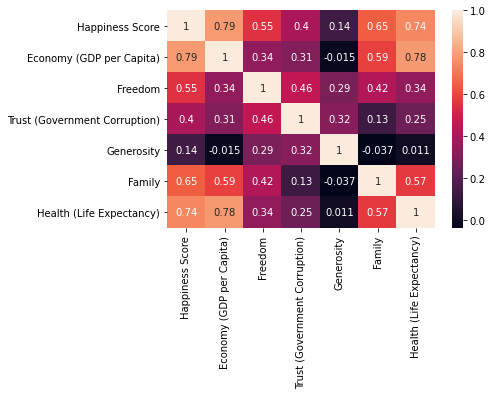

In [18]:
something_else_df = pd.DataFrame(clean_data,columns=['Happiness Score','Economy (GDP per Capita)','Freedom','Trust (Government Corruption)','Generosity', 'Family', 'Health (Life Expectancy)'])

corrMatrix = something_else_df.corr()
sn.heatmap(corrMatrix, annot=True)

plt.show()

r value is: 0.7892839967173202
r squared value is: 0.6229692274740667


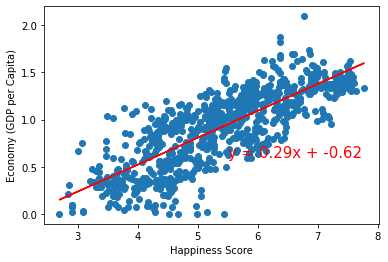

In [19]:
# happiness vs GDP
x_values = clean_data["Happiness Score"]
y_values = clean_data["Economy (GDP per Capita)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.5,0.6),fontsize=15,color="red")
plt.xlabel('Happiness Score')
plt.ylabel('Economy (GDP per Capita)')
print(f"r value is: {rvalue}")
print(f"r squared value is: {rvalue**2}")
plt.show()

r value is: 0.6487993447615127
r squared value is: 0.4209405897629682


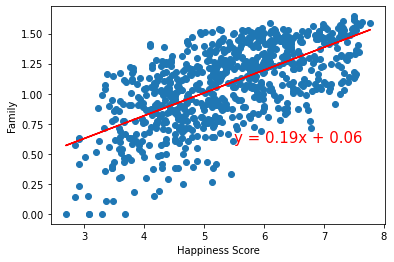

In [20]:
# happiness vs family
x_values = clean_data["Happiness Score"]
y_values = clean_data["Family"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.5,0.6),fontsize=15,color="red")
plt.xlabel('Happiness Score')
plt.ylabel('Family')
print(f"r value is: {rvalue}")
print(f"r squared value is: {rvalue**2}")
plt.show()

r value is: 0.7424557422153406
r squared value is: 0.5512405291485323


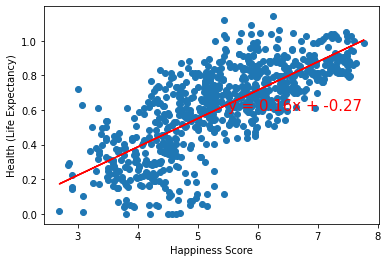

In [21]:
# happiness vs Health
x_values = clean_data["Happiness Score"]
y_values = clean_data["Health (Life Expectancy)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.5,0.6),fontsize=15,color="red")
plt.xlabel('Happiness Score')
plt.ylabel('Health (Life Expectancy)')
print(f"r value is: {rvalue}")
print(f"r squared value is: {rvalue**2}")
plt.show()

r value is: 0.7843375705680518
r squared value is: 0.6151854246045936


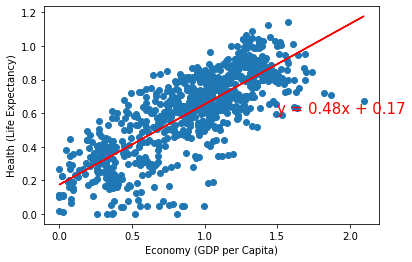

In [22]:
# GDP vs Health
x_values = clean_data["Economy (GDP per Capita)"]
y_values = clean_data["Health (Life Expectancy)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1.5,0.6),fontsize=15,color="red")
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Health (Life Expectancy)')
print(f"r value is: {rvalue}")
print(f"r squared value is: {rvalue**2}")
plt.show()

In [23]:
# create summary table with statistics

In [27]:
clean_data['Country'].nunique()

166

In [24]:
# 2019 region testing
df2019 = data(2019, 0)
df2019_region = df2019.groupby("Region").mean()
df2019_region.sort_values('Happiness Score', ascending=False)
df_ = df2019_region[['Year', 'Happiness Score']]
df_.sort_values('Happiness Score', ascending=False)

,Year,Happiness Score
Region,,
Australia and New Zealand,2019.0,7.267500
North America,2019.0,7.085000
Western Europe,2019.0,6.770909
Latin America and Caribbean,2019.0,5.942550
Eastern Asia,2019.0,5.688833
Central and Eastern Europe,2019.0,5.571786
Southeastern Asia,2019.0,5.273667
Middle East and Northern Africa,2019.0,5.237000
Southern Asia,2019.0,4.526857


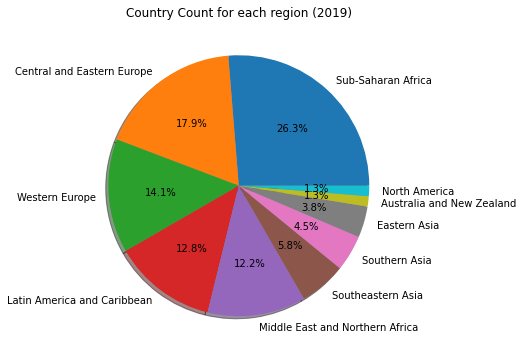

In [25]:
counts = df2019['Region'].value_counts()
counts.plot.pie(figsize=(6,6), shadow=True, startangle=0, autopct='%1.1f%%')
plt.title("Country Count for each region (2019)")
plt.ylabel(' ')
plt.show()

In [26]:
lineplot_df = clean_data.groupby(['Year','Country']).mean()
lineplot_df.sort_values(['Happiness Score'], ascending=False)

,,latitude,longitude,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Year,Country,,,,,,,,,,,
2019,Finland,61.924110,25.748151,1,7.769,1.340000,1.587000,0.986000,0.596000,0.393000,0.153000,NaN
2018,Finland,61.924110,25.748151,1,7.632,1.305000,1.592000,0.874000,0.681000,0.393000,0.202000,NaN
2019,Denmark,56.263920,9.501785,2,7.600,1.383000,1.573000,0.996000,0.592000,0.410000,0.252000,NaN
2018,Norway,60.472024,8.468946,2,7.594,1.456000,1.582000,0.861000,0.686000,0.340000,0.286000,NaN
2015,Switzerland,46.818188,8.227512,1,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380
...,...,...,...,...,...,...,...,...,...,...,...,...
2018,Burundi,-3.373056,29.918886,156,2.905,0.091000,0.627000,0.145000,0.065000,0.076000,0.149000,NaN
2017,Burundi,-3.373056,29.918886,154,2.905,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435,1.683024
2019,South Sudan,12.862807,30.217636,156,2.853,0.306000,0.575000,0.295000,0.010000,0.091000,0.202000,NaN
